## 5. Model

Model bude trieda plniaca nasledovne ucely:
- Bude obsahovat zoznam vrstiev
- Bude implementovat algoritmus trenovania
- Bude vediet spocitat predikciu

In [1]:
import numpy as np

from utils import dataset_Circles, draw_DecisionBoundary
from layer import Input, Dense
from loss import CreateLossFunction
from optimizer import GradientDescent


In [2]:
class Model:
    def __init__(self, layers):
        self.layers = layers
        self.loss = None
        self.optimizer = None

    def initialize(self, loss, optimizer):
        # Nase vlastne si odlozime
        self.loss = loss
        self.optimizer = optimizer

        # 1. Inicializujeme vsetky vrstvy
        prevLayer = None
        for l in self.layers:
            l.initialize(prevLayer)
            prevLayer = l

    def __call__(self, x):
        # 2. Priamy prechod - predikcia
        a = x
        for l in self.layers:
            a, _ = l.forward(a)

        # Len 2 triedy nas tu zaujimaju
        a = (a > 0.5).astype(float)
        return a

    def train(self, X, Y, epochs, devX=None, devY=None):
        pass        

        


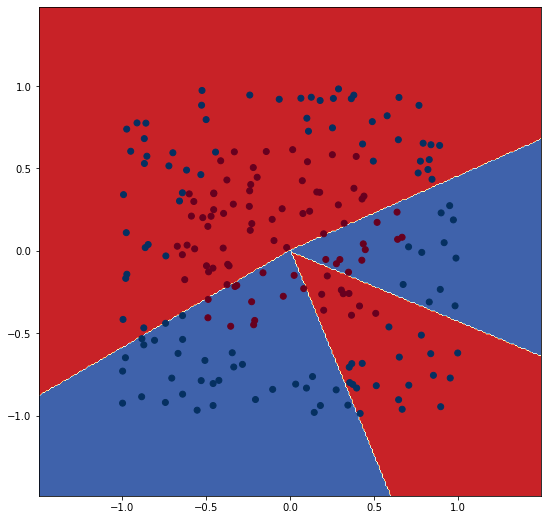

In [3]:
def test_Model():

    np.random.seed(10)

    # Spravime dataset
    X, Y = dataset_Circles(m=1000)
    devX, devY = dataset_Circles(m=200)

    nx, m = X.shape
    ny, _ = Y.shape

    # Skusime otestovat, ci nam to dobre funguje
    model = Model([
        Input(nx),
        Dense(5, act='relu'),
        Dense(ny, act='sigmoid')
    ])

    # Inicializujeme model
    model.initialize(
        loss=CreateLossFunction('bce'),
        optimizer=GradientDescent(0.01)
    )

    # Ucime
    model.train(X, Y, 1000, devX, devY)

    # Kreslime vysledok
    draw_DecisionBoundary(devX, devY, model)


test_Model()